# COGS 108 - EDA Checkpoint

# Names
Listed by alphabetical order
- Alexander Zhen
- Athena Wu
- Chaowen Cao
- Takafumi Matsui
- Xinheng Wang

# Research Question

### To what extent does home field advantage affect the winning rate of MLB teams, disregarding other factors not related to the home field, and how does this effect vary across different teams?

To what extent does home field advantage influence the winning rates of MLB teams, and how does this effect vary across different teams? Specifically, we aim to isolate the impact of playing at home by disregarding factors not directly related to the home field, such as jet lag, travel time, and other travel-related considerations. Additionally, we consider game-specific data, including stadium attendance, game-day weather, and park-specific factors, to refine our analysis. This analysis is intended for multiple seasons and is divided for 2 periods: 2017-2019(pre-Covid) and 2021-2023(post-Covid).

## Background and Prior Work

  In sports, the concept of home advantage refers to the benefit that the home team is said to have over the visiting team. For instance, if a game takes place in city A, team A from city A is said to have a home advantage when playing against team B from city B. Some believe that home teams have advantages over visiting teams in both the psychological and the physical aspect. Due to physical proximity, audiences of the game are more likely to be fans of the home team.Physically, the visiting team often faces challenges such as adjusting to different time zones, unfamiliar environments, and unique stadium conditions. These factors are believed to contribute to the advantages for home teams, potentially impacting the game’s outcome.

  In a study done by Barry and Barsky<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1), it is shown that home game advantage varies across different sports. Hockey and basketball shows the most significant differences, meaning that the home team has the most significant advantage. On the other hand, home teams of football games has a smaller advantage while home teams of baseball has the least advantage over the visiting team compared to other sports. Furthermore, in this study, the authors reached the conclusion that other factors, such as audience support, play a role in the effectiveness of home game advantages.

  In another study done by Harville and Smith<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2), the effects of home game advantages on college basketball teams were analyzed. The authors concluded that the estimated benefit of playing at home is about 4.68 points, and this advantage is approximately the same across different teams.

  Other studies have shown the effects of home game advantages across different sports. For example, in the study done by Nevill et al.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3), major team sports are shown to be positively impacted by the home game advantage. In American football, of the 2592 games analyzed, the home winning percentage is 57.3%. On the other hand, in ice hockey, the home winning percentage is 59.5%. Soccer shows an even higher home winning rate of 63.9%.

  In a blog post “Is there a home-game advantage in professional sport?”<a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4), written by Peter Hersh,  the home-game advantages of MLB (Major League Baseball), NBA (National Basketball Association), NFL (National Football League), and NHL (National Hockey League) over the past decade are analyzed. Based on the analysis, all 4 sports show an advantage when the games are played at home. Overall, MLB shows the smallest advantage compared to other sports. During the year of the pandemic, however, MLB shows the greatest home advantage compared to the other team sports.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Schwartz, Barry, and Stephen F. Barsky. “The Home Advantage.” Social Forces 55, no. 3 (1977): 641–61. https://www.jstor.org/stable/2577461

2. <a name="cite_note-2"></a> [^](#cite_ref-2) Harville, David A., and Michael H. Smith. “The Home-Court Advantage: How Large Is It, and Does It Vary from Team to Team?” The American Statistician 48, no. 1 (1994): 22–28. https://www.jstor.org/stable/2685080

3. <a name="cite_note-3"></a> [^](#cite_ref-3) Nevill, A.M., Holder, R.L. Home Advantage in Sport. Sports Med 28, 221–236 (1999). https://doi.org/10.2165/00007256-199928040-00001

4. <a name="cite_note-4"></a> [^](#cite_ref-4) Hersh P. Is there a home-game advantage in professional sports? (June, 2023).https://community.jmp.com/t5/JMP-Blog/Is-there-a-home-game-advantage-in-professional-sports/ba-p/641566

# Hypothesis


 ### Hypothesis:
After excluding factors not directly related to home-field advantage—such as jet lag, travel fatigue, and other travel-related considerations—we hypothesize that MLB teams will have a significantly higher winning rate when playing at home compared to away games. The magnitude of this advantage is expected to vary between teams, influenced by factors such as fan support, familiarity with playing conditions, and stadium-specific characteristics.

### Explanations:
 We expect teams to be performing better at home because of the psychological benefits of fan support and field conditions. Although travel fatigue and jet lag are two main reasons impacting team performance as a whole, these factors are excluded from this analysis to make the difference purely related to playing at home stadium. This hypothesis is inspired by substantial evidence in sports psychology and player metrics indicating that home-field advantage is one of the main players in team performance.

# Data

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

## Win/Lose and Weather Data

## Dataset Overview
### Win/Lose and Weather Data
- **Link to dataset:** [RetroSheet](https://www.retrosheet.org/boxesetc/index.html)
- **Number of Observations:** 
- `2017 Season:` 2,468
- `2018 Season:` 2,464
- `2019 Season:` 2,466
- `2021 Season:` 2,466
- `2022 Season:` 2,470
- `2023 Season:` 2,471
- **Total Observations**: 14,811
- **Number of variables**: 7
- **Description:** This dataset contains game-level information in regards to wins, losses and weather (temperature and windspeed) for the MLB games during the `2017 to 2019 (Pre-Covid) Seasons` and `2021 to 2023 (Post-Covid) Seasons`.\
Included are the variables:\
`Date`: This variable contains the date of each game, using proper conversion for ease of readable and later analyses.\
`H_Team`: This is a categorical variable, which represents the home team of each game.\
`V_Team`: This is a categorical variable, which represents the visiting team of each game.\
`Home Team Score (hrun)`: This is an integer variable, this stores the amount of runs that are scored by each of the home teams.\
`Visiting Team Score (vrun)`: This is an integer variable, this stores the amount of runs that are scored by each of the visiting teams.\
`Temp`: This is a numerical variable, this stores the temperature of each game, in Fahrenheit.\
`Windspeed`: This is a numerical variable, this stores the wind speed of each game, in miles per hour.\
\
This dataset was cleaned by removing the rows that contain the American League (ALS) vs. the National League (NLS). These games do not pertain to the overall dataset, as the stadium and teams played are chosen by the fans, media, and players. The dataset also does not indicate which teams played that year, so excluding it out of our dataset is important. Another aspect was the `date` column in the original data; it was difficult to read and didn't help us with the time analysis later on. Therefore, converting the `date` column in a manageable format (`YYYY/MM/DD`) would help us easily work and manipulate the data for each game.

In [2]:
data_2017 = {}
data_2018 = {}
data_2019 = {}
data_2021 = {}
data_2022 = {}
data_2023 = {}


with open('data/2017gameinfo.csv', 'r') as file:
    header = file.readline().strip().split(',')
   
    for column in header:
        data_2017[column] = []
   
    for line in file:
        values = line.strip().split(',')
        for column, value in zip(header, values):
            data_2017[column].append(value)


with open('data/2018gameinfo.csv', 'r') as file:
    header = file.readline().strip().split(',')
   
    for column in header:
        data_2018[column] = []
   
    for line in file:
        values = line.strip().split(',')
        for column, value in zip(header, values):
            data_2018[column].append(value)


with open('data/2019gameinfo.csv', 'r') as file:
    header = file.readline().strip().split(',')


    for column in header:
        data_2019[column] = []


    for line in file:
        values = line.strip().split(',')
        for column, value in zip(header, values):
            data_2019[column].append(value)


with open('data/2021gameinfo.csv', 'r') as file:
    header = file.readline().strip().split(',')
   
    for column in header:
        data_2021[column] = []
   
    for line in file:
        values = line.strip().split(',')
        for column, value in zip(header, values):
            data_2021[column].append(value)


with open('data/2022gameinfo.csv', 'r') as file:
    header = file.readline().strip().split(',')
   
    for column in header:
        data_2022[column] = []
   
    for line in file:
        values = line.strip().split(',')
        for column, value in zip(header, values):
            data_2022[column].append(value)


with open('data/2023gameinfo.csv', 'r') as file:
    header = file.readline().strip().split(',')
   
    for column in header:
        data_2023[column] = []
       
    for line in file:
        values = line.strip().split(',')
        for column, value in zip(header, values):
            data_2023[column].append(value)


In [3]:
temp_data = []
windspeed_data = []
all_visiting_score = []
all_home_score = []
home_teams = []
visiting_teams = []
dates = []

for i in range(len(data_2017['date'])):
    dates.append(data_2017['date'][i])
    home_teams.append(data_2017['hometeam'][i])
    visiting_teams.append(data_2017['visteam'][i])
    all_home_score.append(int(data_2017['hruns'][i]))
    all_visiting_score.append(int(data_2017['vruns'][i]))
    temp_data.append(data_2017.get('temp', [None])[i])
    windspeed_data.append(data_2017.get('windspeed', [None])[i])


df = pd.DataFrame({
    'Date': dates,
    'H_Team': home_teams,
    'V_Team': visiting_teams,
    'Home Team Score': all_home_score,
    'Visiting Team Score': all_visiting_score,
    'Temperature': temp_data,
    'Windspeed': windspeed_data
})

df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y/%m/%d')

df = df[~df['H_Team'].isin(['ALS', 'NLS'])].reset_index(drop=True)

df = df.sort_values('H_Team')

df = df.reset_index(drop=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df_2017 = df
print(df)

            Date H_Team V_Team  Home Team Score  Visiting Team Score Temperature Windspeed
0     2017/08/27    ANA    HOU                5                    7          86         8
1     2017/04/08    ANA    SEA                5                    4          63         9
2     2017/09/30    ANA    SEA                4                    6          73         9
3     2017/08/04    ANA    OAK                8                    6          83         8
4     2017/08/21    ANA    TEX                3                    5          77         8
...          ...    ...    ...              ...                  ...         ...       ...
2463  2017/08/26    WAS    NYN                9                    4          77         4
2464  2017/07/26    WAS    MIL                8                    5          84         8
2465  2017/07/27    WAS    MIL               15                    2          82         4
2466  2017/07/29    WAS    COL                2                    4          74         3

In [4]:
# analyze data of 2018
temp_data = []
windspeed_data = []
all_visiting_score = []
all_home_score = []
home_teams = []
visiting_teams = []
dates = []

for i in range(len(data_2018['date'])):
    dates.append(data_2018['date'][i])
    home_teams.append(data_2018['hometeam'][i])
    visiting_teams.append(data_2018['visteam'][i])
    all_home_score.append(int(data_2018['hruns'][i]))
    all_visiting_score.append(int(data_2018['vruns'][i]))
    temp_data.append(data_2018.get('temp', [None])[i])
    windspeed_data.append(data_2018.get('windspeed', [None])[i])


df = pd.DataFrame({
    'Date': dates,
    'H_Team': home_teams,
    'V_Team': visiting_teams,
    'Home Team Score': all_home_score,
    'Visiting Team Score': all_visiting_score,
    'Temperature': temp_data,
    'Windspeed': windspeed_data
})

df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y/%m/%d')

df = df[~df['H_Team'].isin(['ALS', 'NLS'])].reset_index(drop=True)

df = df.sort_values('H_Team')

df = df.reset_index(drop=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df_2018 = df
print(df)

            Date H_Team V_Team  Home Team Score  Visiting Team Score Temperature Windspeed
0     2018/06/23    ANA    TOR                1                    4          68        11
1     2018/04/06    ANA    OAK               13                    9          65         4
2     2018/09/25    ANA    TEX                4                    1          70         5
3     2018/05/10    ANA    MIN                7                    4          68         8
4     2018/05/11    ANA    MIN                4                    5          61        10
...          ...    ...    ...              ...                  ...         ...       ...
2459  2018/04/29    WAS    ARI                3                    1          54        18
2460  2018/09/22    WAS    NYN                6                    0          76        13
2461  2018/07/20    WAS    ATL                5                    8          82        13
2462  2018/05/23    WAS    SDN                1                    3          81        10

In [5]:
# analyze data of 2019
temp_data = []
windspeed_data = []
all_visiting_score = []
all_home_score = []
home_teams = []
visiting_teams = []
dates = []


for i in range(len(data_2019['date'])):
    dates.append(data_2019['date'][i])
    home_teams.append(data_2019['hometeam'][i])
    visiting_teams.append(data_2019['visteam'][i])
    all_home_score.append(int(data_2019['hruns'][i]))
    all_visiting_score.append(int(data_2019['vruns'][i]))
    temp_data.append(data_2019.get('temp', [None])[i])
    windspeed_data.append(data_2019.get('windspeed', [None])[i])

df = pd.DataFrame({
    'Date': dates,
    'H_Team': home_teams,
    'V_Team': visiting_teams,
    'Home Team Score': all_home_score,
    'Visiting Team Score': all_visiting_score,
    'Temperature': temp_data,
    'Windspeed': windspeed_data
})

df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y/%m/%d')

df = df[~df['H_Team'].isin(['ALS', 'NLS'])].reset_index(drop=True)

df = df.sort_values('H_Team')

df = df.reset_index(drop=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df_2019 = df

print(df)

            Date H_Team V_Team  Home Team Score  Visiting Team Score Temperature Windspeed
0     2019/06/09    ANA    SEA                3                    9          80         8
1     2019/09/09    ANA    CLE                2                    6          73         5
2     2019/07/16    ANA    HOU                7                    2          74         8
3     2019/09/10    ANA    CLE                0                    8          72         8
4     2019/05/19    ANA    KCA                1                    5          61         6
...          ...    ...    ...              ...                  ...         ...       ...
2461  2019/06/15    WAS    ARI                3                   10          82        14
2462  2019/04/26    WAS    SDN                3                    4          63        10
2463  2019/04/28    WAS    SDN                7                    6          70         6
2464  2019/04/02    WAS    PHI                2                    8          45         8

In [6]:
# analyze data of 2021
temp_data = []
windspeed_data = []
all_visiting_score = []
all_home_score = []
home_teams = []
visiting_teams = []
dates = []


# Extract relevant data
for i in range(len(data_2021['date'])):
    dates.append(data_2021['date'][i])
    home_teams.append(data_2021['hometeam'][i])
    visiting_teams.append(data_2021['visteam'][i])
    all_home_score.append(int(data_2021['hruns'][i]))
    all_visiting_score.append(int(data_2021['vruns'][i]))
    temp_data.append(data_2021.get('temp', [None])[i])
    windspeed_data.append(data_2021.get('windspeed', [None])[i])

df = pd.DataFrame({
    'Date': dates,
    'H_Team': home_teams,
    'V_Team': visiting_teams,
    'Home Team Score': all_home_score,
    'Visiting Team Score': all_visiting_score,
    'Temperature': temp_data,
    'Windspeed': windspeed_data
})

df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y/%m/%d')

df = df[~df['H_Team'].isin(['ALS', 'NLS'])].reset_index(drop=True)

df = df.sort_values('H_Team')

df = df.reset_index(drop=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df_2021 = df

print(df)

            Date H_Team V_Team  Home Team Score  Visiting Team Score Temperature Windspeed
0     2021/04/01    ANA    CHA                4                    3          81         6
1     2021/05/17    ANA    CLE                7                    4          66         8
2     2021/07/29    ANA    OAK                0                    4          82         8
3     2021/09/19    ANA    OAK                2                    3          75         7
4     2021/05/18    ANA    CLE                5                    6          70        11
...          ...    ...    ...              ...                  ...         ...       ...
2461  2021/08/30    WAS    PHI                4                    7          82         6
2462  2021/05/25    WAS    CIN                1                    2          78         9
2463  2021/08/31    WAS    PHI                6                   12          83         3
2464  2021/08/13    WAS    ATL                2                    4          76         2

In [7]:
# analyze data of 2022
temp_data = []
windspeed_data = []
all_visiting_score = []
all_home_score = []
home_teams = []
visiting_teams = []
dates = []

for i in range(len(data_2022['date'])):
    dates.append(data_2022['date'][i])
    home_teams.append(data_2022['hometeam'][i])
    visiting_teams.append(data_2022['visteam'][i])
    all_home_score.append(int(data_2022['hruns'][i]))
    all_visiting_score.append(int(data_2022['vruns'][i]))
    temp_data.append(data_2022.get('temp', [None])[i])
    windspeed_data.append(data_2022.get('windspeed', [None])[i])

df = pd.DataFrame({
    'Date': dates,
    'H_Team': home_teams,
    'V_Team': visiting_teams,
    'Home Team Score': all_home_score,
    'Visiting Team Score': all_visiting_score,
    'Temperature': temp_data,
    'Windspeed': windspeed_data
})

df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y/%m/%d')

df = df[~df['H_Team'].isin(['ALS', 'NLS'])].reset_index(drop=True)

df = df.sort_values('H_Team')

df = df.reset_index(drop=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df_2022 = df

print(df)

            Date H_Team V_Team  Home Team Score  Visiting Team Score Temperature Windspeed
0     2022/04/07    ANA    HOU                1                    3          93         6
1     2022/09/06    ANA    DET                5                    4          87         8
2     2022/09/07    ANA    DET                4                    5          99         4
3     2022/07/16    ANA    LAN                1                    7          77        10
4     2022/07/15    ANA    LAN                1                    9          79         8
...          ...    ...    ...              ...                  ...         ...       ...
2465  2022/04/24    WAS    SFN                3                   12          76         4
2466  2022/08/27    WAS    CIN                2                    6          85         2
2467  2022/05/15    WAS    HOU                0                    8          77         4
2468  2022/07/03    WAS    MIA                4                    7          82         4

In [8]:
# analyze data of 2023
temp_data = []
windspeed_data = []
all_visiting_score = []
all_home_score = []
home_teams = []
visiting_teams = []
dates = []


# Extract relevant data
for i in range(len(data_2023['date'])):
    dates.append(data_2023['date'][i])
    home_teams.append(data_2023['hometeam'][i])
    visiting_teams.append(data_2023['visteam'][i])
    all_home_score.append(int(data_2023['hruns'][i]))
    all_visiting_score.append(int(data_2023['vruns'][i]))
    temp_data.append(data_2023.get('temp', [None])[i])
    windspeed_data.append(data_2023.get('windspeed', [None])[i])

df = pd.DataFrame({
    'Date': dates,
    'H_Team': home_teams,
    'V_Team': visiting_teams,
    'Home Team Score': all_home_score,
    'Visiting Team Score': all_visiting_score,
    'Temperature': temp_data,
    'Windspeed': windspeed_data
})

df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y/%m/%d')

df = df[~df['H_Team'].isin(['ALS', 'NLS'])].reset_index(drop=True)

df = df.sort_values('H_Team')

df = df.reset_index(drop=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df_2023 = df

print(df)

            Date H_Team V_Team  Home Team Score  Visiting Team Score Temperature Windspeed
0     2023/07/18    ANA    NYA                5                    1          82         9
1     2023/07/02    ANA    ARI                5                    2          80         6
2     2023/07/01    ANA    ARI                1                    3          69        11
3     2023/06/30    ANA    ARI                2                    6          76         8
4     2023/06/29    ANA    CHA                7                    9          75         8
...          ...    ...    ...              ...                  ...         ...       ...
2466  2023/09/05    WAS    NYN                5                   11          92         2
2467  2023/07/03    WAS    CIN                2                    3          86         5
2468  2023/08/19    WAS    PHI                3                   12          80         5
2469  2023/03/30    WAS    ATL                2                    7          45         8

In [10]:
field_data_pre_covid = pd.concat([df_2017,df_2018,df_2019],ignore_index=True)
field_data_post_covid = pd.concat([df_2021,df_2022,df_2023],ignore_index=True)

In [11]:
num_observations_2017 = df_2017.shape[0]
num_observations_2018 = df_2018.shape[0]
num_observations_2019 = df_2019.shape[0]
num_observations_2021 = df_2021.shape[0]
num_observations_2022 = df_2022.shape[0]
num_observations_2023 = df_2023.shape[0]

num_var_2017 = df_2017.shape[1]
num_var_2018 = df_2018.shape[1]
num_var_2019 = df_2019.shape[1]
num_var_2021 = df_2021.shape[1]
num_var_2022 = df_2022.shape[1]
num_var_2023 = df_2023.shape[1]

print("Win/Lose Data of 2017")
print(f"Number of observations: {num_observations_2017}")
print(f"Number of variables: {num_var_2017}")
print()
print("Win/Lose Data of 2018")
print(f"Number of observations: {num_observations_2018}")
print(f"Number of variables: {num_var_2018}")
print()
print("Win/Lose Data of 2019")
print(f"Number of observations: {num_observations_2019}")
print(f"Number of variables: {num_var_2019}")
print()
print("Win/Lose Data of 2021")
print(f"Number of observations: {num_observations_2021}")
print(f"Number of variables: {num_var_2021}")
print()
print("Win/Lose Data of 2022")
print(f"Number of observations: {num_observations_2022}")
print(f"Number of variables: {num_var_2022}")
print()
print("Win/Lose Data of 2023")
print(f"Number of observations: {num_observations_2023}")
print(f"Number of variables: {num_var_2023}")
print()

num_observations_pre = field_data_pre_covid.shape[0]
num_observations_post = field_data_post_covid.shape[0]
num_var_pre = field_data_pre_covid.shape[1]
num_var_post = field_data_post_covid.shape[1]

print("Win/Lose Data Pre Covid")
print(f"Number of observations: {num_observations_pre}")
print(f"Number of variables: {num_var_pre}")
print("\nPost-Covid Game Logs Cleaned:")
print(f"Number of observations: {num_observations_post}")
print(f"Number of variables: {num_var_post}")


Win/Lose Data of 2017
Number of observations: 2468
Number of variables: 7

Win/Lose Data of 2018
Number of observations: 2464
Number of variables: 7

Win/Lose Data of 2019
Number of observations: 2466
Number of variables: 7

Win/Lose Data of 2021
Number of observations: 2466
Number of variables: 7

Win/Lose Data of 2022
Number of observations: 2470
Number of variables: 7

Win/Lose Data of 2023
Number of observations: 2471
Number of variables: 7

Win/Lose Data Pre Covid
Number of observations: 7398
Number of variables: 7

Post-Covid Game Logs Cleaned:
Number of observations: 7407
Number of variables: 7


## Injury Report Data and Baseball Reference Game Logs

In [20]:
injury_report = pd.read_csv('data/Injury_report.csv')
game_log_2017 = pd.read_csv('data/processed_2017.csv')
game_log_2018 = pd.read_csv('data/processed_2018.csv')
game_log_2019 = pd.read_csv('data/processed_2019.csv')
game_log_2021 = pd.read_csv('data/processed_2021.csv')
game_log_2022 = pd.read_csv('data/processed_2022.csv')
game_log_2023 = pd.read_csv('data/processed_2023.csv')

In [21]:
injury_report_cleaned = injury_report.copy()

injury_report_cleaned.dropna(subset=['Date', 'Team'], inplace=True)

injury_report_cleaned = injury_report_cleaned.fillna({'Acquired': 'Unknown', 'Relinquished': 'Unknown'})

injury_report_cleaned['Injury Type'] = injury_report_cleaned['Notes'].str.extract(r'with (.*?)(?:\srecovering|\.|$)')

injury_report_cleaned['Off IL Date'] = injury_report_cleaned['Notes'].str.extract(r'returning on (\d{4}-\d{2}-\d{2})')

pre_covid_logs_cleaned = []
post_covid_logs_cleaned = []

for game_log in [game_log_2017, game_log_2018, game_log_2019]:
    game_log_cleaned = game_log.copy()


    columns_with_urls = ['Date', 'Opp', 'Win', 'Loss', 'Save', 'Unnamed: 2']
    for col in columns_with_urls:
        if col in game_log_cleaned.columns:
            game_log_cleaned[col] = game_log_cleaned[col].str.replace(r'\(.*?\)', '', regex=True).str.strip()

    columns_to_drop = ['Unnamed: 2', 'Unnamed: 4', 'Orig. Scheduled']
    game_log_cleaned.drop(columns=[col for col in columns_to_drop if col in game_log_cleaned.columns], inplace=True)

    game_log_cleaned['Streak'] = game_log_cleaned['Streak'].str.replace(r'[^+-]', '', regex=True)

    game_log_cleaned = game_log_cleaned.fillna({'W/L': 'Unknown', 'R': 0, 'RA': 0, 'Attendance': 0})

    pre_covid_logs_cleaned.append(game_log_cleaned)

for game_log in [game_log_2021, game_log_2022, game_log_2023]:
    game_log_cleaned = game_log.copy()

    columns_with_urls = ['Date', 'Opp', 'Win', 'Loss', 'Save', 'Unnamed: 2']
    for col in columns_with_urls:
        if col in game_log_cleaned.columns:
            game_log_cleaned[col] = game_log_cleaned[col].str.replace(r'\(.*?\)', '', regex=True).str.strip()

    columns_to_drop = ['Unnamed: 2', 'Unnamed: 4', 'Orig. Scheduled']
    game_log_cleaned.drop(columns=[col for col in columns_to_drop if col in game_log_cleaned.columns], inplace=True)

    game_log_cleaned['Streak'] = game_log_cleaned['Streak'].str.replace(r'[^+-]', '', regex=True)

    game_log_cleaned = game_log_cleaned.fillna({'W/L': 'Unknown', 'R': 0, 'RA': 0, 'Attendance': 0})

    post_covid_logs_cleaned.append(game_log_cleaned)

combined_pre_covid_logs = pd.concat(pre_covid_logs_cleaned, ignore_index=True)
combined_post_covid_logs = pd.concat(post_covid_logs_cleaned, ignore_index=True)

injury_report_cleaned.to_csv('injury_report_cleaned.csv', index=False)
combined_pre_covid_logs.to_csv('combined_pre_covid_logs_cleaned.csv', index=False)
combined_post_covid_logs.to_csv('combined_post_covid_logs_cleaned.csv', index=False)


In [22]:
print("Injury Report Cleaned:")
print(f"Number of observations: {injury_report_cleaned.shape[0]}")
print(f"Number of variables: {injury_report_cleaned.shape[1]}")
print("\nPre-Covid Game Logs Cleaned:")
print(f"Number of observations: {combined_pre_covid_logs.shape[0]}")
print(f"Number of variables: {combined_pre_covid_logs.shape[1]}")
print("\nPost-Covid Game Logs Cleaned:")
print(f"Number of observations: {combined_post_covid_logs.shape[0]}")
print(f"Number of variables: {combined_post_covid_logs.shape[1]}")

print("Cleaned Injury Report Dataset:")
print(injury_report_cleaned.head())
print("\nCombined Pre-COVID Game Logs Dataset (2017-2019):")
print(combined_pre_covid_logs.head())
print("\nCombined Post-COVID Game Logs Dataset (2021-2023):")
print(combined_post_covid_logs.head())

Injury Report Cleaned:
Number of observations: 11682
Number of variables: 7

Pre-Covid Game Logs Cleaned:
Number of observations: 15243
Number of variables: 19

Post-Covid Game Logs Cleaned:
Number of observations: 15238
Number of variables: 19
Cleaned Injury Report Dataset:
         Date       Team Acquired      Relinquished                                              Notes              Injury Type Off IL Date
0  2017-02-14     Braves  Unknown  • Jacob Lindgren  placed on 60-day DL recovering from ligament r...                      NaN         NaN
1  2017-02-14  Nationals  Unknown   • Aaron Barrett  placed on 60-day DL recovering from ligament r...                      NaN         NaN
2  2017-02-14    Rangers  Unknown    • Jake Diekman  placed on 60-day DL recovering from surgery to...                      NaN         NaN
3  2017-02-14    Rangers  Unknown  • Prince Fielder   placed on 60-day DL with herniated discs in neck  herniated discs in neck         NaN
4  2017-02-14       Reds

## Dataset Overview

### Injury Report Dataset
- **Number of Observations**: 11682
- **Number of Variables**: 7
- **Description**: The Injury Report dataset provides detailed information about MLB player injuries, including columns such as `Date`, `Team`, `Acquired`, `Relinquished`, and `Notes`. The `Notes` column describes the injury details, from which new columns such as `Injury Type` and `Off IL Date` have been extracted. This dataset is crucial for analyzing the impact of injuries on team performance and player availability. The dataset was cleaned by dropping rows with missing `Date` or `Team`, and filling missing values in other columns with 'Unknown'.

### Pre-COVID Game Logs (2017-2019)
- **Number of Observations**: 15243
- **Number of Variables**: 19
- **Description**: The Pre-COVID Game Logs dataset includes game details for MLB seasons from 2017 to 2019. Key columns include `Date`, `Tm` (team), `Opp` (opponent), `W/L` (win/loss), `R` (runs), `RA` (runs allowed), and `Attendance`. The dataset was cleaned by removing unnecessary columns, converting `Date` to a standardized format, and stripping URLs from various fields. This dataset is used to understand team performance trends before the COVID-19 pandemic.

### Post-COVID Game Logs (2021-2023)
- **Number of Observations**: 15238
- **Number of Variables**: 19
- **Description**: The Post-COVID Game Logs dataset covers MLB game details for the 2021 to 2023 seasons. Similar to the Pre-COVID dataset, it contains information such as `Date`, `Tm`, `Opp`, `W/L`, `R`, `RA`, and `Attendance`. The cleaning process involved URL removal, column standardization, and handling missing values. This dataset allows for a comparative analysis of team performances in a post-pandemic context.

## Ballpark Factors

Ballpark factors are data provided by Google Cloud which show the biasness of the ballpark. Google Cloud explains, "Statcast park effects show the observed effect of each displayed stat based on the events in the selected park. Each number is set so that “100” is average for that metric, and the park-specific number is generated by looking at each batter and pitcher, controlled by handedness, and comparing the frequency of that metric in the selected park compared to the performance of those players in other parks.
For example, the 135 HR mark for 2018-2020 at Great American Ball Park does not mean the Reds hit 35% more home runs at their home park. It means for batters and pitchers who played both at GABP and elsewhere, 35% more home runs were observed at GABP."

In [23]:
rawdata_dic = {}
for year in ['2017-2019','2021-2023']:
    for dn in ['day','night']:
        data_name = f"park_factor_{year}_{dn}"
        with open(f"data/park_factor_{year}_{dn}.html","r") as f:
            rawdata_dic[data_name] = f.read()

In [24]:
column_list = []
row_dict = {}
for key,value in rawdata_dic.items():
    soup = BeautifulSoup(value, "html.parser")
    columns = soup.find(class_ = "tr-component-row")
    columns = columns.find_all('th')
    for column in columns:
        column_list.append(column.get_text(strip=True))
    rows = soup.find_all(class_ = 'default-table-row')
    row_list = []
    for row in rows:
        lst = []
        data = row.find_all('td')
        for datum in data:
            lst.append(datum.get_text(strip=True))
        row_list.append(lst)
    row_dict[key] = row_list

In [25]:
column_list = list(dict.fromkeys(column_list))

In [26]:
df_dict = {}
for key,value in row_dict.items():
    df_dict[key] = pd.DataFrame(columns = column_list, data= value)

In [27]:
park_factor_2017_2019_day = df_dict['park_factor_2017-2019_day']
park_factor_2017_2019_night = df_dict['park_factor_2017-2019_night']
park_factor_2021_2023_day = df_dict['park_factor_2021-2023_day']
park_factor_2021_2023_night = df_dict['park_factor_2021-2023_night']

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Injury Rate and Winning Rate 

The injury rate and winning rate of each team is analyzed below.

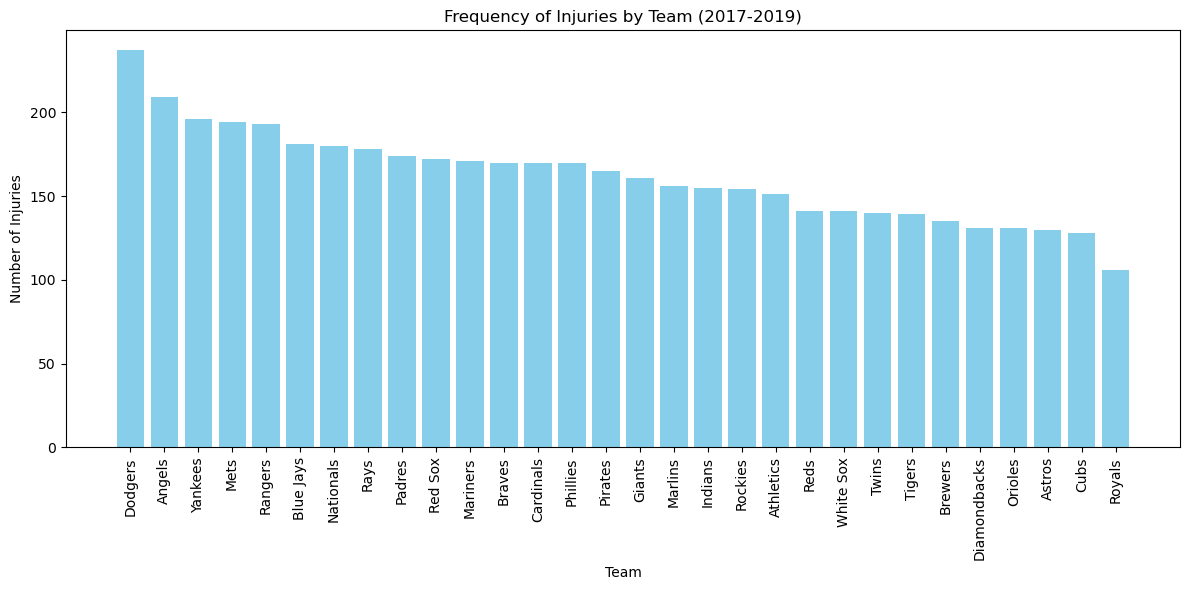

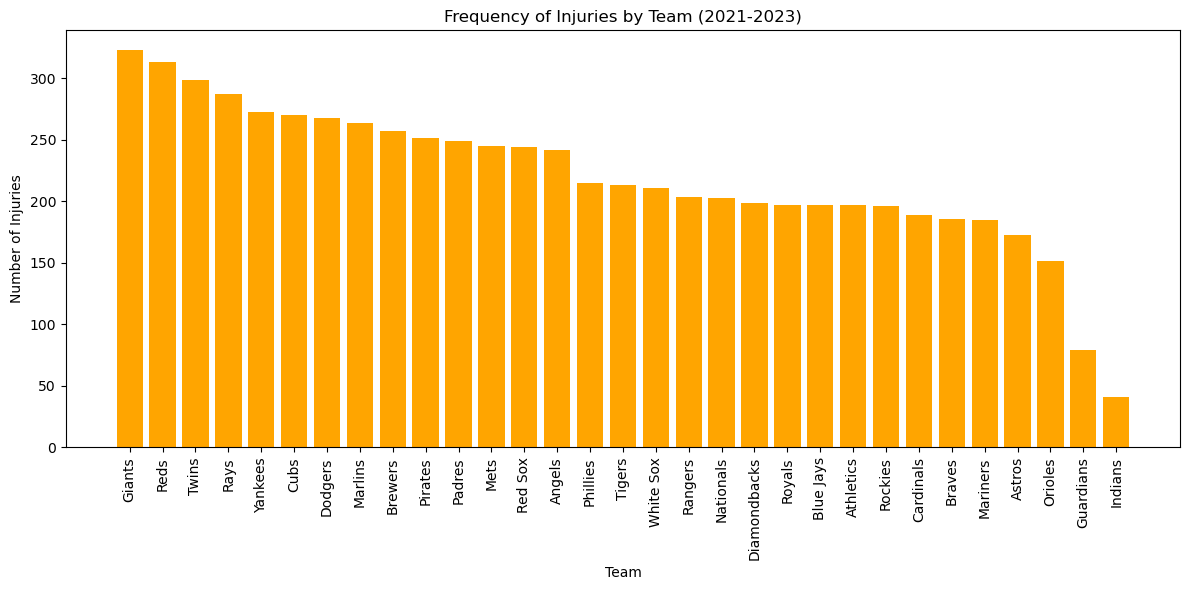

Win/Loss Ratios for Similar Teams (2017-2019):
Mariners vs Pirates - Win/Loss Ratios: 0.94 vs 0.87
Braves vs Indians - Win/Loss Ratios: 1.12 vs 1.40
Brewers vs White Sox - Win/Loss Ratios: 1.25 vs 0.71
Reds vs White Sox - Win/Loss Ratios: 0.76 vs 0.71
White Sox vs Brewers - Win/Loss Ratios: 0.71 vs 1.25
Red Sox vs Nationals - Win/Loss Ratios: 1.43 vs 1.29
Astros vs White Sox - Win/Loss Ratios: 1.73 vs 0.71
Astros vs Twins - Win/Loss Ratios: 1.73 vs 1.17
Red Sox vs Rays - Win/Loss Ratios: 1.43 vs 1.21
Giants vs Padres - Win/Loss Ratios: 0.79 vs 0.74
Padres vs Braves - Win/Loss Ratios: 0.74 vs 1.12
Orioles vs Cubs - Win/Loss Ratios: 0.57 vs 1.23
Giants vs Pirates - Win/Loss Ratios: 0.79 vs 0.87
Cardinals vs Red Sox - Win/Loss Ratios: 1.15 vs 1.43
Marlins vs Giants - Win/Loss Ratios: 0.68 vs 0.79
Indians vs Marlins - Win/Loss Ratios: 1.40 vs 0.68
Rangers vs Rays - Win/Loss Ratios: 0.85 vs 1.21
Padres vs Cardinals - Win/Loss Ratios: 0.74 vs 1.15
Tigers vs Diamondbacks - Win/Loss Ratios: 0.

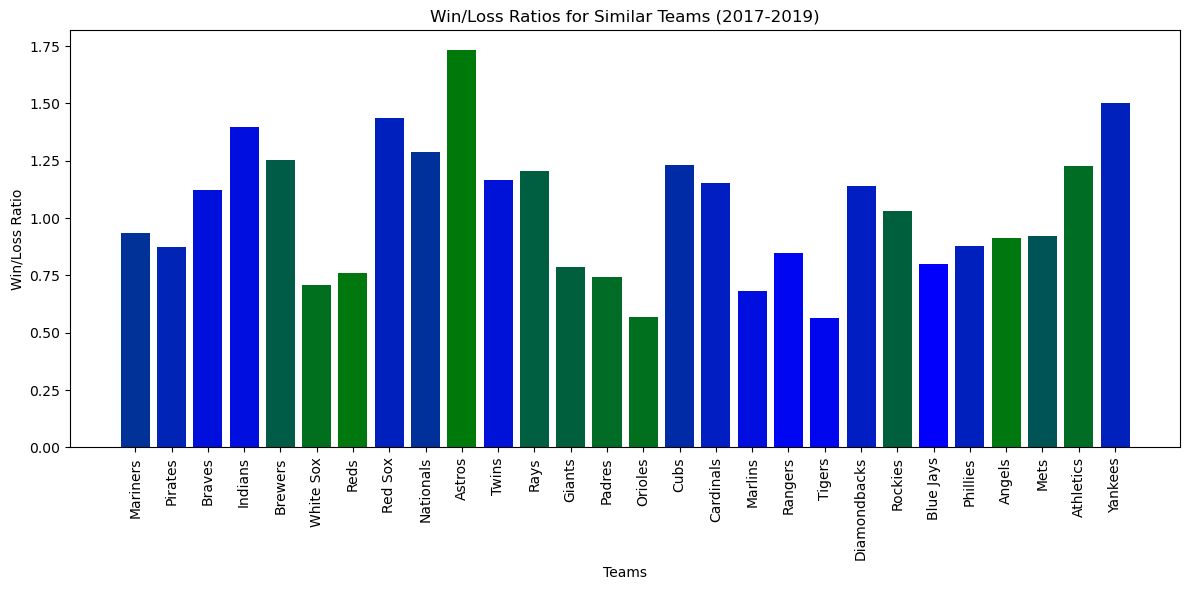

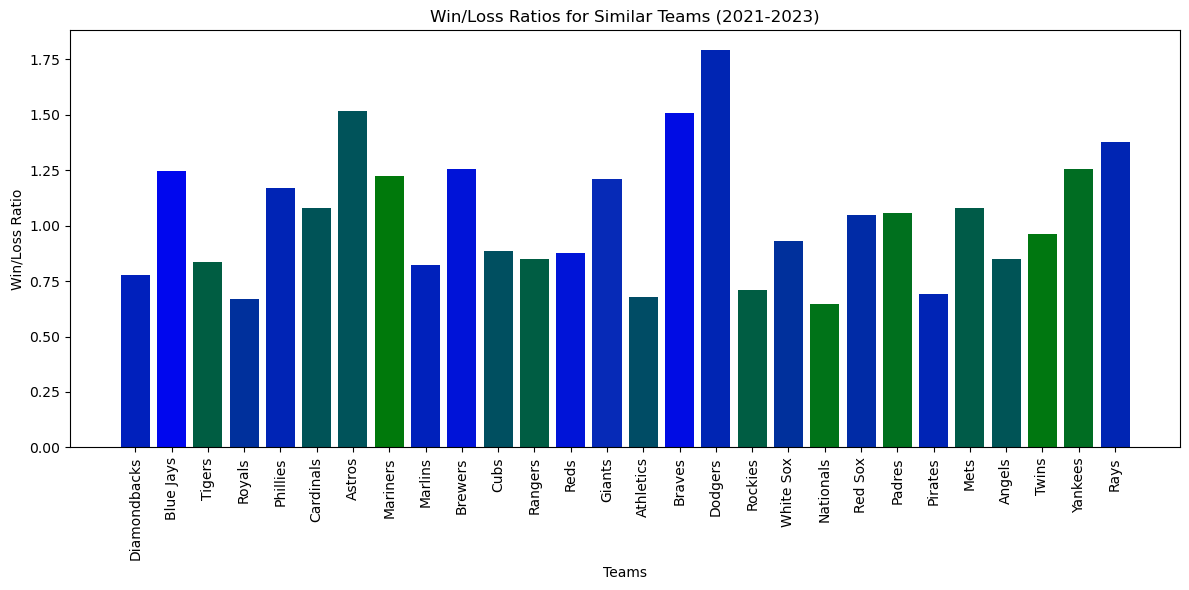

In [28]:
# File paths
injury_file_path = 'injury_report_cleaned.csv'
game_stats_2017_2019_path = 'data/2017-2019_gamestats.csv'
game_stats_2021_2023_path = 'data/2021-2023_gamestats.csv'

# Step 1: Load the Injury Report and Win/Loss Data
injury_df = pd.read_csv(injury_file_path)
game_stats_2017_2019 = pd.read_csv(game_stats_2017_2019_path)
game_stats_2021_2023 = pd.read_csv(game_stats_2021_2023_path)

# Step 2: Process Injury Data to Find Teams with Similar Injury Frequencies
# Extract injury frequency for the periods 2017-2019 and 2021-2023
injury_df['Date'] = pd.to_datetime(injury_df['Date'], errors='coerce')
injury_df['Year'] = injury_df['Date'].dt.year

injury_2017_2019 = injury_df[(injury_df['Year'] >= 2017) & (injury_df['Year'] <= 2019)]
team_injury_counts_2017_2019 = injury_2017_2019['Team'].value_counts()

injury_2021_2023 = injury_df[(injury_df['Year'] >= 2021) & (injury_df['Year'] <= 2023)]
team_injury_counts_2021_2023 = injury_2021_2023['Team'].value_counts()

# Plotting the injury frequency graphs for both periods
plt.figure(figsize=(12, 6))
plt.bar(team_injury_counts_2017_2019.index, team_injury_counts_2017_2019.values, color='skyblue')
plt.xlabel('Team')
plt.ylabel('Number of Injuries')
plt.title('Frequency of Injuries by Team (2017-2019)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(team_injury_counts_2021_2023.index, team_injury_counts_2021_2023.values, color='orange')
plt.xlabel('Team')
plt.ylabel('Number of Injuries')
plt.title('Frequency of Injuries by Team (2021-2023)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Define a threshold for similar injury frequencies (e.g., within 10%)
threshold = 0.10

# Helper function to find teams with similar injury frequencies
def find_similar_teams(team_injury_counts, threshold):
    similar_teams = []
    for team, count in team_injury_counts.items():
        for other_team, other_count in team_injury_counts.items():
            if team != other_team and abs(count - other_count) / count <= threshold:
                similar_teams.append((team, other_team))
    return list(set(similar_teams))

similar_teams_2017_2019 = find_similar_teams(team_injury_counts_2017_2019, threshold)
similar_teams_2021_2023 = find_similar_teams(team_injury_counts_2021_2023, threshold)

# Step 3: Create a mapping between full team names and abbreviations
team_name_mapping = {
    'Diamondbacks': 'ARI',
    'Cardinals': 'SLN',
    'Rays': 'TBA',
    'Orioles': 'BAL',
    'Red Sox': 'BOS',
    'Reds': 'CIN',
    'Astros': 'HOU',
    'Dodgers': 'LAN',
    'Brewers': 'MIL',
    'Twins': 'MIN',
    'Mets': 'NYN',
    'Athletics': 'OAK',
    'Rangers': 'TEX',
    'Nationals': 'WAS',
    'White Sox': 'CHA',
    'Angels': 'ANA',
    'Rockies': 'COL',
    'Tigers': 'DET',
    'Phillies': 'PHI',
    'Pirates': 'PIT',
    'Padres': 'SDN',
    'Cubs': 'CHN',
    'Royals': 'KCA',
    'Yankees': 'NYA',
    'Mariners': 'SEA',
    'Giants': 'SFN',
    'Indians': 'CLE',
    'Marlins': 'MIA',
    'Blue Jays': 'TOR',
    'Braves': 'ATL',
    'Guardians': 'CLE'  # Guardians is the updated name for Indians
}

# Step 4: Compare Win/Loss Records for Similar Teams
# Define a function to calculate win/loss ratio from game stats using team name mapping
def calculate_win_loss_ratio(game_stats, team_name_full):
    # Convert the full team name to the abbreviation using the mapping
    team_name = team_name_mapping.get(team_name_full)
    if not team_name:
        return 0  # If team name is not in the mapping, return 0

    # Count wins and losses using 'wteam' and 'lteam' columns
    wins = len(game_stats[game_stats['wteam'] == team_name])
    losses = len(game_stats[game_stats['lteam'] == team_name])
    return wins / max(losses, 1)  # Avoid division by zero

# Compare win/loss ratios for similar teams in 2017-2019
win_loss_ratios_2017_2019 = []
print("Win/Loss Ratios for Similar Teams (2017-2019):")
for team_1, team_2 in similar_teams_2017_2019:
    win_loss_ratio_team_1 = calculate_win_loss_ratio(game_stats_2017_2019, team_1)
    win_loss_ratio_team_2 = calculate_win_loss_ratio(game_stats_2017_2019, team_2)
    win_loss_ratios_2017_2019.append((team_1, win_loss_ratio_team_1, team_2, win_loss_ratio_team_2))
    print(f"{team_1} vs {team_2} - Win/Loss Ratios: {win_loss_ratio_team_1:.2f} vs {win_loss_ratio_team_2:.2f}")

# Compare win/loss ratios for similar teams in 2021-2023
win_loss_ratios_2021_2023 = []
print("\nWin/Loss Ratios for Similar Teams (2021-2023):")
for team_1, team_2 in similar_teams_2021_2023:
    win_loss_ratio_team_1 = calculate_win_loss_ratio(game_stats_2021_2023, team_1)
    win_loss_ratio_team_2 = calculate_win_loss_ratio(game_stats_2021_2023, team_2)
    win_loss_ratios_2021_2023.append((team_1, win_loss_ratio_team_1, team_2, win_loss_ratio_team_2))
    print(f"{team_1} vs {team_2} - Win/Loss Ratios: {win_loss_ratio_team_1:.2f} vs {win_loss_ratio_team_2:.2f}")

# Plotting Win/Loss Ratios for Similar Teams
# 2017-2019
plt.figure(figsize=(12, 6))
for team_1, ratio_1, team_2, ratio_2 in win_loss_ratios_2017_2019:
    plt.bar(team_1, ratio_1, color='blue', alpha=0.6, label=team_1)
    plt.bar(team_2, ratio_2, color='green', alpha=0.6, label=team_2)
plt.xlabel('Teams')
plt.ylabel('Win/Loss Ratio')
plt.title('Win/Loss Ratios for Similar Teams (2017-2019)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2021-2023
plt.figure(figsize=(12, 6))
for team_1, ratio_1, team_2, ratio_2 in win_loss_ratios_2021_2023:
    plt.bar(team_1, ratio_1, color='blue', alpha=0.6, label=team_1)
    plt.bar(team_2, ratio_2, color='green', alpha=0.6, label=team_2)
plt.xlabel('Teams')
plt.ylabel('Win/Loss Ratio')
plt.title('Win/Loss Ratios for Similar Teams (2021-2023)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Summary Analysis

#### 1. Injury Frequency vs. Performance

- **Data Grouping**:  
  Teams from two periods (**2017-2019** and **2021-2023**) were grouped based on injury frequency using a threshold of **0.1** for similarity.

- **Visualization**:  
  Bar charts were used to depict injury counts across the periods.

- **Objective**:  
  Analyze if teams with similar injury rates had comparable win/loss ratios.

- **Findings**:  
  Injury frequency alone does not strongly correlate with team performance.


#### 2. Similar Teams Comparison by Win/Loss Ratios

- **Teams with similar injury frequencies were compared**:
  - **Example 1**:
    - **2017-2019**: Despite similar injury rates, the **Phillies** (win/loss ratio: **0.88**) outperformed the **Marlins** (**0.68**).
  - **Example 2**:
    - **2021-2023**: The **Rockies** outperformed the **Athletics** in win/loss ratios, despite comparable injury rates.

- **Conclusion**:  
  Similar injury rates do not guarantee similar performance, suggesting the influence of external factors like roster depth and management.
### 3. Performance Trends Across Periods

- **General Observations**:
  - High injury counts **negatively impact performance**, but the relationship is neither linear nor consistent.
  - Certain teams, such as the **Dodgers**, performed well even with high injury counts, indicating strong depth and effective management.
  - Conversely, teams like the **Royals**, with lower injuries, still struggled, showing that success depends on more than just avoiding injuries.
  
- **Key Insight**:  
  Factors like squad quality, tactical decisions, and player form significantly impact outcomes.

### 4. Notable Findings

- **Threshold-Based Analysis**:  
  Setting an injury frequency threshold (**0.1**) allowed focused comparisons between teams with similar injury rates.

- **Team Depth and Management**:  
  - Teams like the **Dodgers** and **Yankees** maintained strong performance despite injuries, emphasizing the role of squad depth and injury management.

- **Impact of Low Injuries**:  
  - Teams like the **Royals**, with few injuries, still failed to capitalize on their advantage, highlighting the importance of other performance factors.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
from sklearn.model_selection import train_test_split

In [53]:
column_drop_list = ['Tm','Opp','R','RA','Win','Loss','Save']
temp_pre_covid = pd.merge(field_data_pre_covid, combined_pre_covid_logs, left_on=['Date','H_Team'],right_on=['Date','Tm']).drop(column_drop_list, axis=1).sort_values('Date').reset_index(drop=True)
temp_post_covid = pd.merge(field_data_post_covid, combined_post_covid_logs, left_on=['Date','H_Team'],right_on=['Date','Tm']).drop(column_drop_list, axis=1).sort_values('Date').reset_index(drop=True)

In [54]:
team_mapping = {
    'CHA': 'White Sox',
    'HOU': 'Astros',
    'MIN': 'Twins',
    'TEX': 'Rangers',
    'TBA': 'Rays',
    'LAN': 'Dodgers',
    'CLE': 'Guardians',
    'OAK': 'Athletics',
    'SEA': 'Mariners',
    'KCA': 'Royals',
    'DET': 'Tigers',
    'SFN': 'Giants',
    'BAL': 'Orioles',
    'BOS': 'Red Sox',
    'COL': 'Rockies',
    'TOR': 'Blue Jays',
    'SDN': 'Padres',
    'NYA': 'Yankees',
    'NYN': 'Mets',
    'WAS': 'Nationals',
    'MIA': 'Marlins',
    'ATL': 'Braves',
    'ANA': 'Angels',
    'PHI': 'Phillies',
    'SLN': 'Cardinals',
    'CHN': 'Cubs',
    'PIT': 'Pirates',
    'CIN': 'Reds',
    'MIL': 'Brewers',
    'ARI': 'D-backs'
}

In [55]:
temp_pre_covid['H_Team'] = temp_pre_covid['H_Team'].map(team_mapping)
temp_pre_covid['V_Team'] = temp_pre_covid['V_Team'].map(team_mapping)
temp_post_covid['H_Team'] = temp_post_covid['H_Team'].map(team_mapping)
temp_post_covid['V_Team'] = temp_post_covid['V_Team'].map(team_mapping)

In [57]:
data_pre_covid_day = pd.merge(temp_pre_covid[temp_pre_covid['D/N']=='D'],park_factor_2017_2019_day,how='left',left_on='H_Team',right_on='Team')
data_pre_covid_night = pd.merge(temp_pre_covid[temp_pre_covid['D/N']=='N'],park_factor_2017_2019_night,how='left',left_on='H_Team',right_on='Team')
data_post_covid_day = pd.merge(temp_pre_covid[temp_pre_covid['D/N']=='D'],park_factor_2021_2023_day,how='left',left_on='H_Team',right_on='Team')
data_post_covid_night = pd.merge(temp_pre_covid[temp_pre_covid['D/N']=='N'],park_factor_2021_2023_night,how='left',left_on='H_Team',right_on='Team')

In [66]:
data_pre_covid = pd.concat([data_pre_covid_day,data_pre_covid_night],ignore_index=True).sort_values('Date').reset_index(drop=True)
data_post_covid = pd.concat([data_post_covid_day,data_post_covid_night],ignore_index=True).sort_values('Date').reset_index(drop=True)

In [71]:
data_post_covid.head()

,Date,H_Team,V_Team,Home Team Score,Visiting Team Score,Temperature,Windspeed,Gm#,W/L,Inn,W-L,Rank,GB,Time,D/N,Attendance,cLI,Streak,Rk.,Team,Venue,Year,Park Factor,wOBACon,BACON,R,OBP,H,1B,2B,3B,HR,BB,SO,PA
0,2017/04/02,D-backs,Giants,6,5,75,7,1,W-wo,NaN,1-0,1,up 0.5,3:23,D,"49,016",1.06,+,16,D-backs,Chase Field,2021-2023,100,99,101,100,101,104,103,114,154,84,97,95,"56,930"
1,2017/04/03,Astros,Mariners,3,0,84,0,1,W,NaN,1-0,1,Tied,2:29,N,"41,678",1.07,+,21,Astros,Minute Maid Park,2021-2023,99,98,98,98,99,98,98,97,103,99,103,99,"43,181"
2,2017/04/03,Athletics,Angels,4,2,59,9,1,W,NaN,1-0,1,Tied,2:56,N,"36,067",1.04,+,28,Athletics,Oakland Coliseum,2021-2023,95,95,96,90,96,96,96,110,93,81,98,102,"30,662"
3,2017/04/03,Red Sox,Pirates,5,3,48,13,1,W,NaN,1-0,1,Tied,3:03,D,"36,594",0.92,+,2,Red Sox,Fenway Park,2021-2023,108,109,109,117,108,111,108,129,127,99,99,95,"58,723"
4,2017/04/03,Rangers,Guardians,5,8,80,5,1,L,NaN,0-1,3,1,3:21,N,"48,350",0.96,-,15,Rangers,Globe Life Field,2021-2023,100,99,98,100,99,100,99,96,78,111,97,96,"39,454"


## Effects of the park factor

# Ethics & Privacy

- The primary data sources would include available MLB statistics (from MLB or 3rd-party), player performance metrics, and environmental factors like weather and travel distances. While this form of data is publicly accessible, there could be some bias in the overrepresentation of certain teams, seasons, or players. The privacy issues would be minimal, as this data involves professional athletes and publicly held games; therefore, much of the statistics and game information would be in the public domain. Terms of use issues would be that some data sources might have restrictions on how their data can be used, as it might violate some of their terms of service if not done properly.

- There are potential biases, like sampling biases, if the dataset doesn't cover all the teams equally or doesn't include certain seasons or games. Different methods of data collection would create some inaccuracies, like, for example, the weather. Weather data collected from far from the station might not accurately reflect the weather conditions of the game. Also, with the distribution of fans, more popular teams would have a larger market size and budget. Allowing these teams to afford better facilities, hire better players, trainers, and travel accommodations.

- To address the confounding variables and any biases they might introduce, we plan to identify and include variables such as weather conditions, player fatigue and injury, team dynamics, and historical performance to control their impact on the analysis. Aligning and keeping our data collection procedures the same across the board in order to minimize any inconsistencies, as well as sensitivity analyses, will further allow us to see if our results change with different assumptions about the confounding variables. In order for organization, we would document and report our procedures with each other and on the notebook; this will ensure transparency on how these confounding variables are being handled and would assist us in discussing their potential impact for our end result.

- Before analysis, perform a proper check on all datasets to see if we missed any values, outliers, or inconsistencies. Ensure that all teams, players, team compositions, and seasons are properly represented in the data. Sourcing data from credible and reliable sources to ensure accurate data. During analysis, we will monitor for any signs of bias, like skewness and adjust any of our models to account for any biases we see or confounding variables. Afterwards, we would cross-reference our findings with our external data and studies to confirm our findings.

- If this data were to be used beyond its intended scope, it might violate some sources’ terms of service, which would lead to some legal and ethical issues. If data steers towards the need to include players’ health, some HIPAA violations would be possible. When analyzing fan attitudes, we need to be careful of perpetuating stereotypes or offending certain groups. We will be using appropriate methods to account for any missing information, gathered properly through data sources that we’ve carefully read and followed their terms of service. If there are restrictions, we will look for any alternative data sources that are open to the public and free to use. When comparing our data, to ensure its accuracy, we use reliable sources to check, as well as thoroughly clean the data to fix any errors or inconsistencies. Present our findings without biases and openly discuss any limitations or potential biases in our studies.




# Team Expectations

* Commitment to Timely Contribution:
Everyone should adhere to deadlines set by the group to ensure that work progresses smoothly.
If someone is unable to complete a task on time, they should inform the team as soon as possible so that adjustments can be made.

* Communication Protocols:
The team will primarily communicate through  Discord.
We will meet weekly on Monday at Geisel to assign new tasks, and to address any concerns.
Everyone in the group are expected to check the Discord daily. If there's a post on Discord, at least a discord-emoji-reaction is expected to make sure everyone read the post. Constructive responses are appreciated.

* Respectful Conflict Resolution:
If conflicts arise, the team will discuss them during scheduled meetings calmly and respectfully. The aim will always be to understand one another’s perspectives and find a solution that works for everyone.

* Task Delegation and Roles:
Tasks will be assigned based on each member and everyone is encouraged to participate in decision-making to distribute responsibilities equitably.
Team members are encouraged to assist each other when someone needs help. Collaboration is key to the project’s success.

* Work Quality and Effort:
Everyone should feel comfortable offering constructive feedback and asking questions whenever clarification is needed.

* Accountability:
Each member will be responsible for the tasks they are assigned. If unexpected situations arise, make sure to mention it on Discord as soon as possible. Remember that everyone in the group are UCSD students and are busy having their assignments/exams as well as you are.

* Inclusiveness and Respect:
All opinions and ideas will be treated with respect. Contributions from every team member are valuable, and everyone will be encouraged to speak up during discussions.

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| Every Monday  |  12 PM | Read the progress made during Last Week  | One-hour weekly meeting at Geisel to share the progress and plans |
| 10/30 |  12 PM |  Read what we need for project proposal | Discuss and make progress to submit the project proposal. |
| 10/30  | Deadline  |  Project Proposal | Finish and push the final data to Github by the end of the day  |
|11/4| 12 PM | Read the DataCheckPoint file to understand what we need for the submission | Discuss who will do which part and make the schedule concrete. |
| 11/11 | 12 PM | Read the progress made by the group until Sunday | Discuss if there's any problem and make sure we can submit them on Wednesday. |
| 11/13  | Deadline  | Checkpoint #1: Data | Finish and push the final data to Github by the end of the day  |
| 11/18 | 12 PM | Read the progress made by the group until Sunday | Discuss who will do which part and make the schedule concrete. |
| 11/25 | 12 PM | Read the progress made by the group until Sunday | Discuss if there's any problem and make sure we can submit them on Wednesday. |
| 11/27  | Deadline  | Checkpoint #2: EDA | Finish and push the final data to Github by the end of the day |
| 12/11 | Deadline | Final submission | |